In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


In [212]:
df = pd.read_csv('model.csv')

In [213]:
df.head()

,Unnamed: 0,Restaurant_ID,Name,City,Alcohol_Service,Smoking_Allowed,Price,Franchise,Area,Parking,Cuisine,Overall_Rating,Food_Rating,Service_Rating
0,0,132560,Puesto de Gorditas,Ciudad Victoria,No,Yes,Low,No,Open,Public,Regional,0.50,1.00,0.250000
1,1,132561,Cafe Ambar,Ciudad Victoria,No,No,Low,No,Closed,Limited,Free,0.75,1.00,1.000000
2,2,132564,Church's,Ciudad Victoria,No,No,Low,No,Closed,Limited,Free,1.25,1.25,1.500000
3,3,132572,Cafe Chaires,San Luis Potosi,No,No,Low,No,Closed,Yes,Cafeteria,1.00,1.00,0.933333
4,4,132583,McDonalds Centro,Cuernavaca,No,No,Low,Yes,Closed,Limited,American,1.00,1.00,1.250000


In [214]:
df = df.drop(['Unnamed: 0', 'Restaurant_ID', 'Name', 'Food_Rating', 'Service_Rating'], axis = 1)

In [215]:
df.head()

,City,Alcohol_Service,Smoking_Allowed,Price,Franchise,Area,Parking,Cuisine,Overall_Rating
0,Ciudad Victoria,No,Yes,Low,No,Open,Public,Regional,0.50
1,Ciudad Victoria,No,No,Low,No,Closed,Limited,Free,0.75
2,Ciudad Victoria,No,No,Low,No,Closed,Limited,Free,1.25
3,San Luis Potosi,No,No,Low,No,Closed,Yes,Cafeteria,1.00
4,Cuernavaca,No,No,Low,Yes,Closed,Limited,American,1.00


In [216]:
#Split train and test sets
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
y = y.astype('str')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [217]:
cat_features = X.select_dtypes(include = 'object').columns
num_features = X.select_dtypes(exclude = 'object').columns

encoder = OneHotEncoder(handle_unknown= 'ignore', sparse_output=False)
scaler = StandardScaler()

#Setup Column Transformer
ct = ColumnTransformer(
    [
        ('OneHotEncoder', encoder, cat_features),
        ('StandardScaler', scaler, num_features)
    ],
    remainder='passthrough'
)

In [218]:
#Apply transformer
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [243]:
#Hyperparameter tuning for each model

params = {
    'params_tree' : {
        'criterion':['entropy', 'log_loss', 'gini'],
        'splitter': ['best', 'random'],
        'max_depth': [2, 3, 5],
        'min_samples_split': [2, 3, 5],
        'max_depth': ['None', 3, 5]
    },

    'params_forest' : {
        'max_depth':[5, 8, 10, None],
        'max_features':[5, 7, 'auto', 8],
        'min_samples_split':[2, 8, 15],
        'n_estimators': [10, 50, 100]
    },
    
    'params_ada' : {
        'n_estimators': [10, 50, 100],
        'algorithm': ['SAMME', 'SAMME.R']
    },
    
    'params_svc': {
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'C':[1, 10, 100, 1000],
        'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]
    }
}

models_params = {
    "DecisionTree": (DecisionTreeClassifier(), params["params_tree"]),
    "RandomForest": (RandomForestClassifier(), params["params_forest"]),
    'Adaboost': (AdaBoostClassifier(), params['params_ada']),
    'SVC': (SVC(), params['params_svc'])
}

def tuning(X_train, y_train):
    best_params = {}
    for model_name, (model, param_grid) in models_params.items():
        grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=0)
        grid_search.fit(X_train, y_train)
        best_params[model_name] = grid_search.best_params_
        print(f"Best params for {model_name}: {grid_search.best_params_}")


In [ ]:
tuning(X_train, y_train)

In [252]:
models = {
    'Linear Regression': LogisticRegression(n_jobs=-1),
    'SVC': SVC(kernel = 'rbf'),
    'Decision Tree': DecisionTreeClassifier(criterion = 'gini', max_depth= 3, min_samples_split =  2, splitter = 'best'),
    'Random Forest': RandomForestClassifier(max_depth = None, max_features = 5, min_samples_split = 2, n_estimators = 50),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier( n_estimators = 50, algorithm='SAMME'),
    'Gradient Boosting': GradientBoostingClassifier()
    
}
list_model = list(models)

def model_score(X_train, y_train, X_test, y_test):
    for i in range(len(list_model)):
        model = list(models.values())[i]
        model.fit(X_train, y_train)
        
        #Make Prediction
        y_pred = model.predict(X_test)
        
        print(list(models.keys())[i])
        
        #Calculate accuracy for test
        print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
 

In [253]:
model_score(X_train, y_train, X_test, y_test)

Linear Regression
Accuracy: 0.08888888888888889

SVC
Accuracy: 0.17777777777777778

Decision Tree
Accuracy: 0.1111111111111111

Random Forest
Accuracy: 0.13333333333333333

K Nearest Neighbors
Accuracy: 0.08888888888888889



C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoost
Accuracy: 0.17777777777777778

Gradient Boosting
Accuracy: 0.08888888888888889



#### Calculate Feature Importance

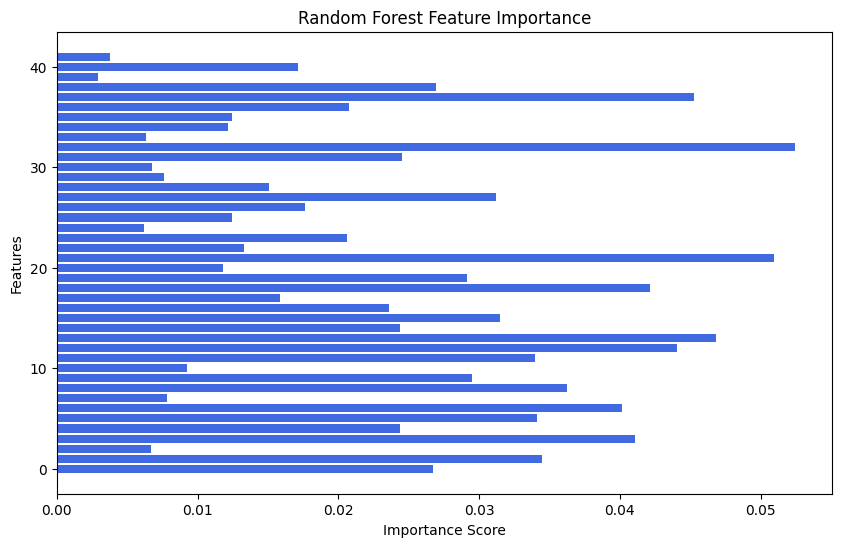

In [258]:
# Get Feature Importance
rf = RandomForestClassifier(max_depth = None, max_features = 5, min_samples_split = 2, n_estimators = 50)
rf.fit(X_train, y_train)

importance = rf.feature_importances_

X = pd.DataFrame(X_train)

# Convert to DataFrame
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)


# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="royalblue")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()

#### Use SVC and AdaBoost

In [251]:
svc = SVC(kernel = 'rbf')
svc.fit(X_train, y_train)

ada = AdaBoostClassifier(n_estimators=50)
ada.fit(X_train, y_train)

AdaBoostClassifier()